<IPython.core.display.Javascript object>


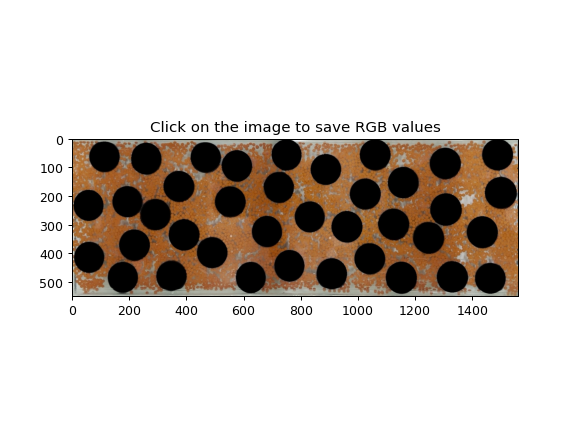

In [3]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# Enable interactive plots in Jupyter Notebook
%matplotlib notebook

def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        x, y = int(event.xdata), int(event.ydata)
        rgb = image[y, x, :]
        print(f"Clicked on pixel ({x}, {y}) with RGB value: {rgb}")
        rgb_values.append(rgb)
        df = pd.DataFrame(rgb_values, columns=['R', 'G', 'B'])
        df.to_csv('rgb_values.csv', index=False)
        print("RGB values saved to 'rgb_values.csv'.")

# Load the image
image_path = 'D:\\Research works\\2D particleFlow SeniorProject 2024\\Videos\\frame_60_transformted_alinemented_0.jpg'
image = cv2.imread(image_path)

# Create an interactive plot
fig, ax = plt.subplots()
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax.set_title('Click on the image to save RGB values')

# List to store RGB values
rgb_values = []

# Connect the click event
fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()


<IPython.core.display.Javascript object>


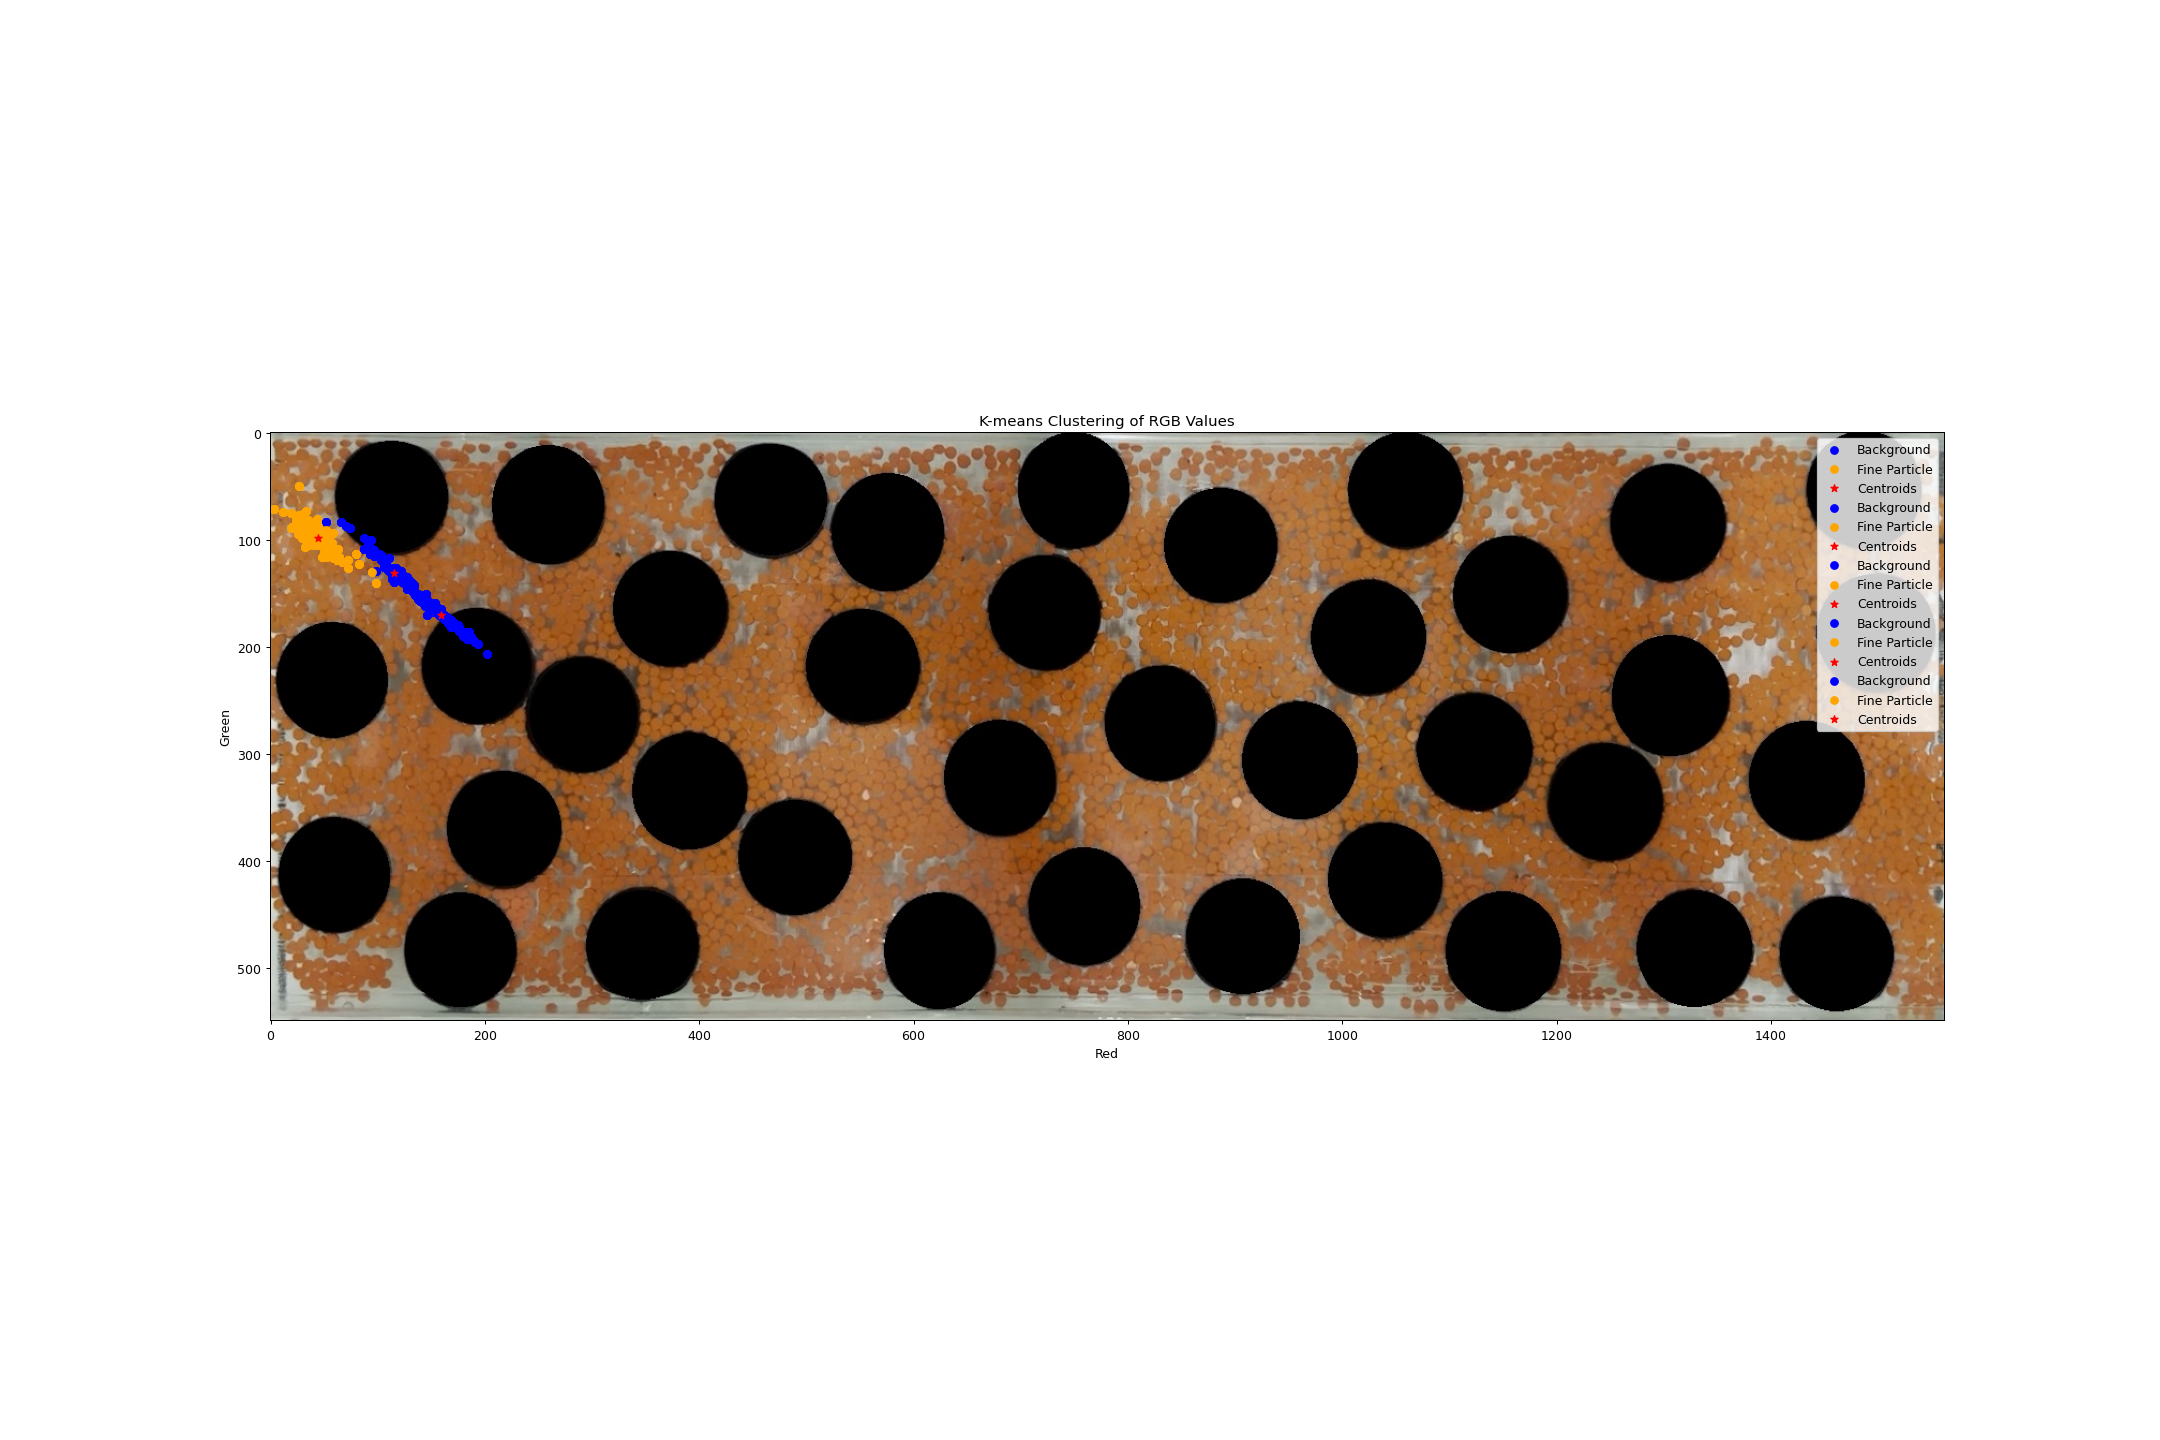

In [9]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        x, y = int(event.xdata), int(event.ydata)
        rgb = image[y, x, :]
        print(f"Clicked on pixel ({x}, {y}) with RGB value: {rgb}")
        rgb_values.append(rgb)
        df = pd.DataFrame(rgb_values, columns=['R', 'G', 'B'])
        df.to_csv('D:/Research works/2D particleFlow SeniorProject 2024/Videos/rgb_values.csv', index=False)
        print("RGB values saved to 'rgb_values.csv'.")

# Load the image
image_path = 'D:/Research works/2D particleFlow SeniorProject 2024/Videos/frame_60_transformted_alinemented_0.jpg'
image = cv2.imread(image_path)

# Create a larger plot window
fig = plt.figure(figsize=(24, 16))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Click on the image to save RGB values')
plt.xlabel('Click anywhere on the image')

# List to store RGB values
rgb_values = []

# Connect the click event
fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()


In [14]:
import os
import cv2
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Suppress warnings
os.environ["OMP_NUM_THREADS"] = "1"


In [17]:

# Load RGB values from CSV files
background_data = pd.read_csv('D:/Research works/2D particleFlow SeniorProject 2024/Videos/rgb_values_background.csv')
fine_particle_data = pd.read_csv('D:/Research works/2D particleFlow SeniorProject 2024/Videos/rgb_values_orange.csv')

# Concatenate the data
all_data = pd.concat([background_data, fine_particle_data])

# Fit K-means clustering model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(all_data)


In [16]:

# Assign labels to each phase
background_label = kmeans.predict(background_data)
fine_particle_label = kmeans.predict(fine_particle_data)

# Plot the result
plt.scatter(background_data['R'], background_data['G'], color='blue', label='Background')
plt.scatter(fine_particle_data['R'], fine_particle_data['G'], color='orange', label='Fine Particle')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='*', label='Centroids')
plt.xlabel('Red')
plt.ylabel('Green')
plt.title('K-means Clustering of RGB Values')
plt.legend()
plt.show()


In [18]:
import os
import warnings
import cv2
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Suppress the UserWarning about memory leak
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

# Set environment variable to address the memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

# Load RGB values from CSV files
background_data = pd.read_csv('D:/Research works/2D particleFlow SeniorProject 2024/Videos/rgb_values_background.csv')
fine_particle_data = pd.read_csv('D:/Research works/2D particleFlow SeniorProject 2024/Videos/rgb_values_orange.csv')

# Concatenate the data
all_data = pd.concat([background_data, fine_particle_data])

# Fit K-means clustering model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(all_data)

# Assign labels to each phase
background_label = kmeans.predict(background_data)
fine_particle_label = kmeans.predict(fine_particle_data)

# Plot the result
plt.scatter(background_data['R'], background_data['G'], color='blue', label='Background')
plt.scatter(fine_particle_data['R'], fine_particle_data['G'], color='orange', label='Fine Particle')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='*', label='Centroids')
plt.xlabel('Red')
plt.ylabel('Green')
plt.title('K-means Clustering of RGB Values')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


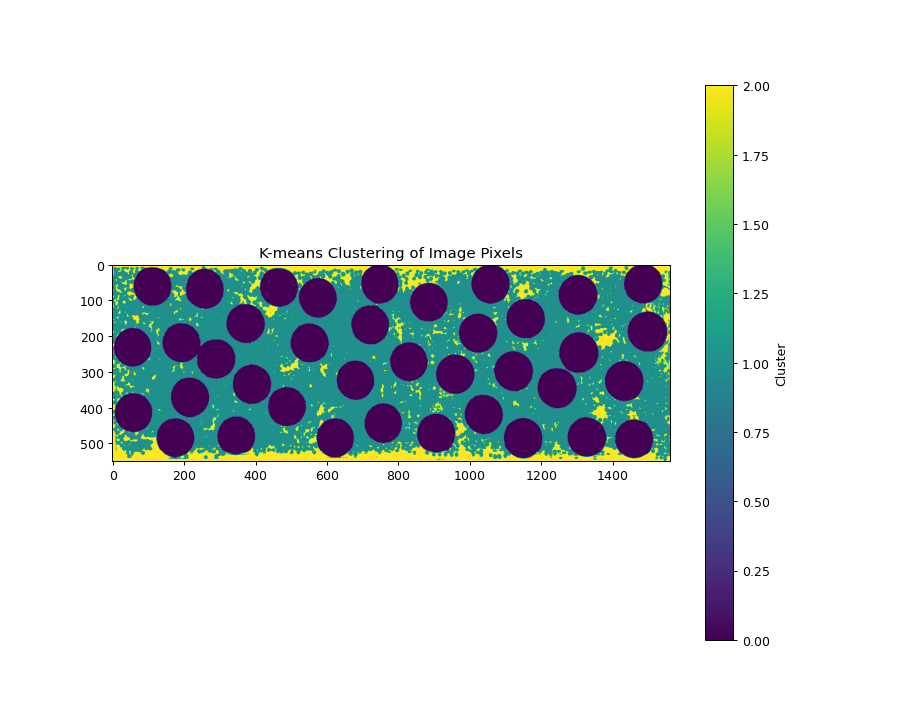

In [19]:
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

# Suppress the UserWarning about memory leak
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

# Set environment variable to address the memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

# Load the image
image_path = 'D:/Research works/2D particleFlow SeniorProject 2024/Videos/frame_60_transformted_alinemented_0.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image into a 2D array of RGB values
image_flat = image_rgb.reshape((-1, 3))

# Convert the reshaped image into a DataFrame
image_df = pd.DataFrame(image_flat, columns=['R', 'G', 'B'])

# Fit K-means clustering model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(image_df)

# Predict labels for each pixel
labels = kmeans.predict(image_df)

# Reshape the labels back into the original image shape
labels = labels.reshape(image_rgb.shape[:2])

# Plot the clustered image
plt.figure(figsize=(10, 8))
plt.imshow(labels, cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('K-means Clustering of Image Pixels')
plt.show()


<IPython.core.display.Javascript object>


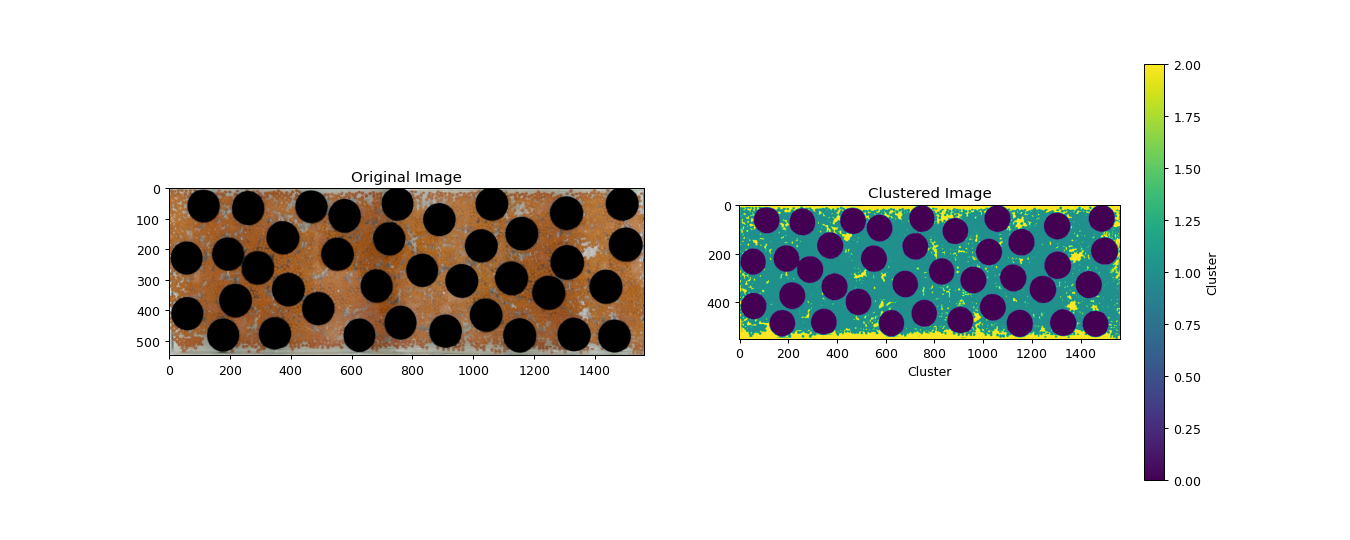

In [21]:
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

# Suppress the UserWarning about memory leak
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

# Set environment variable to address the memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

# Load the image
image_path = 'D:/Research works/2D particleFlow SeniorProject 2024/Videos/frame_60_transformted_alinemented_0.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image into a 2D array of RGB values
image_flat = image_rgb.reshape((-1, 3))

# Convert the reshaped image into a DataFrame
image_df = pd.DataFrame(image_flat, columns=['R', 'G', 'B'])

# Fit K-means clustering model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(image_df)

# Predict labels for each pixel
labels = kmeans.predict(image_df)

# Reshape the labels back into the original image shape
labels = labels.reshape(image_rgb.shape[:2])

# Plot the original and clustered images side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the original image
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')

# Plot the clustered image
clustered_image = axes[1].imshow(labels, cmap='viridis')
axes[1].set_title('Clustered Image')
axes[1].set_xlabel('Cluster')

# Add colorbar using the clustered image as the mappable object
plt.colorbar(clustered_image, ax=axes[1], label='Cluster')

plt.show()
